In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.stats import zscore
from sklearn.metrics import silhouette_score,classification_report
import pandas as pd

pd.options.display.max_columns=1000

In [2]:
import pandas as pd
import pycaret
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


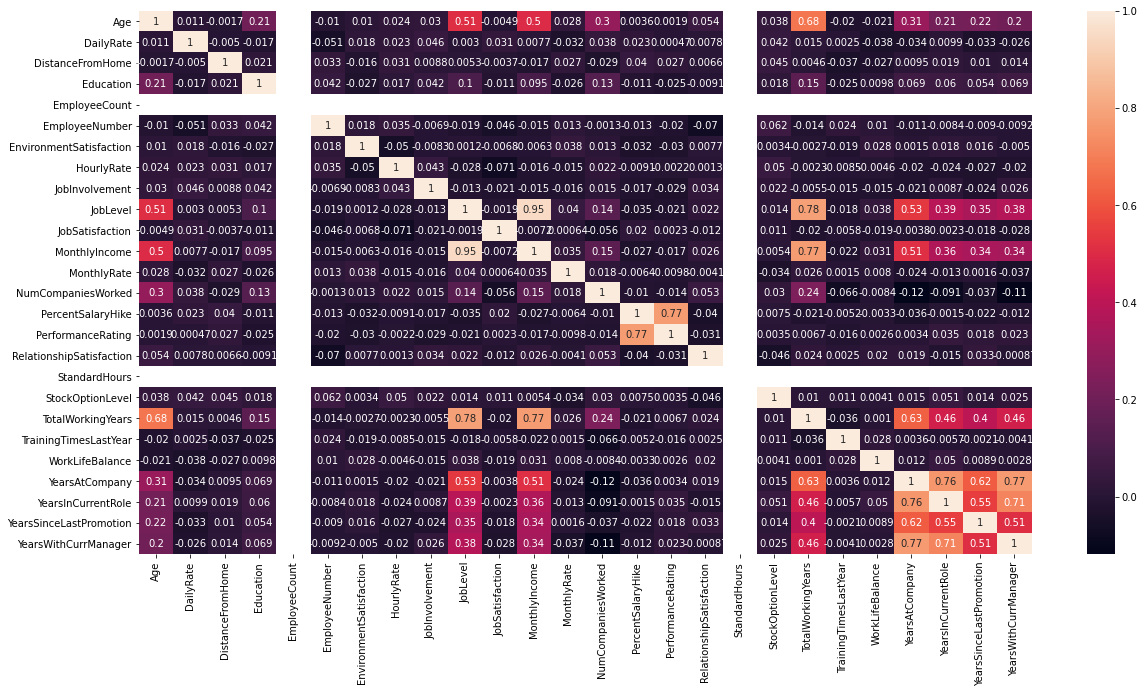

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [5]:
df.drop(columns=['EmployeeCount','StandardHours'] , inplace=True)

In [6]:
df_num=df.select_dtypes(exclude='object')
df_num_scaled=df_num.apply(zscore)

# encode categorical data
df_cat=df.select_dtypes(include='object')
df_cat_dummy=pd.get_dummies(df_cat, drop_first=True)


# concat numerical & categorical data
xscaled=pd.concat([df_num_scaled,df_cat_dummy] , axis=1).reset_index(drop=True)
xscaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,-1.696298,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [7]:
xscaled["Attrition_Yes"].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [8]:
X = xscaled.drop(["Attrition_Yes"],axis=1)

In [9]:
from sklearn.model_selection import train_test_split

y = xscaled["Attrition_Yes"]

# RidgeClassifier Imbalanced Dataset

Accuracy: 0.8775510204081632


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      0.88      0.93       418\n'
 '           1       0.29      0.91      0.44        23\n'
 '\n'
 '    accuracy                           0.88       441\n'
 '   macro avg       0.64      0.89      0.68       441\n'
 'weighted avg       0.96      0.88      0.91       441\n')


[[366  52]
 [  2  21]]




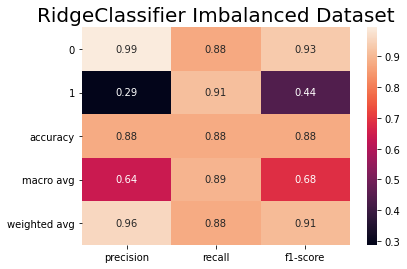

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4176,
                solver='auto', tol=0.001)
rc.fit(X_train,y_train)

y_pred=rc.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)
print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RidgeClassifier Imbalanced Dataset",fontsize=20)

plt.savefig("RidgeClassifier Imbalanced Dataset.jpg",bbox_inches="tight")

# RandomForestClassifier  Imbalanced Dataset

Accuracy: 0.8503401360544217


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.98      0.86      0.92       416\n'
 '           1       0.22      0.64      0.33        25\n'
 '\n'
 '    accuracy                           0.85       441\n'
 '   macro avg       0.60      0.75      0.62       441\n'
 'weighted avg       0.93      0.85      0.88       441\n')


[[359  57]
 [  9  16]]




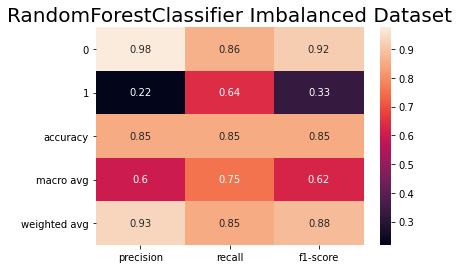

In [11]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4176,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)
print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RandomForestClassifier Imbalanced Dataset",fontsize=20)

plt.savefig("RandomForestClassifier Imbalanced Dataset.jpg",bbox_inches="tight")


# SMOTE

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_train=X_train_res
y_train=y_train_res
y_train.value_counts()

0    873
1    873
Name: Attrition_Yes, dtype: int64

# RidgeClassifier - SMOTE

Accuracy: 0.8458049886621315


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.88      0.91       386\n'
 '           1       0.42      0.62      0.50        55\n'
 '\n'
 '    accuracy                           0.85       441\n'
 '   macro avg       0.68      0.75      0.70       441\n'
 'weighted avg       0.88      0.85      0.86       441\n')


[[339  47]
 [ 21  34]]




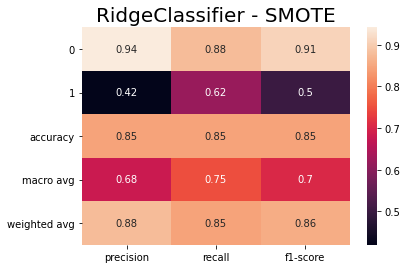

In [13]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4176,
                solver='auto', tol=0.001)
rc.fit(X_train,y_train)

y_pred=rc.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)

print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RidgeClassifier - SMOTE",fontsize=20)

plt.savefig("RidgeClassifier - SMOTE.jpg",bbox_inches="tight")

# RandomForestClassifier - SMOTE

Accuracy: 0.8435374149659864


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.97      0.85      0.91       411\n'
 '           1       0.26      0.70      0.38        30\n'
 '\n'
 '    accuracy                           0.84       441\n'
 '   macro avg       0.62      0.78      0.64       441\n'
 'weighted avg       0.93      0.84      0.87       441\n')


[[351  60]
 [  9  21]]




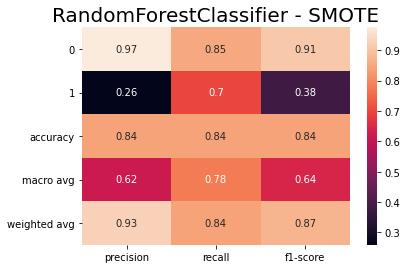

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4176,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)
print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RandomForestClassifier - SMOTE",fontsize=20)

plt.savefig("RandomForestClassifier - SMOTE",bbox_inches="tight")

# Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA
xscaled.shape[1]

46

In [16]:
xscaled.drop(["Attrition_Yes"],axis=1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,-1.696298,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,1.721670,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,0.227347,-0.469754,-0.393938,-1.868426,1.723332,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,-1.086676,-1.605183,-0.640727,0.085049,1.726655,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,1.322365,0.546677,-0.887515,0.085049,1.728317,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [17]:
pca=PCA(n_components=46)
compo=pca.fit_transform(xscaled)

In [18]:
evr=pca.explained_variance_ratio_*100
evr

array([1.72695648e+01, 6.75342904e+00, 6.45139692e+00, 4.63970969e+00,
       4.20311404e+00, 4.08573200e+00, 3.90765168e+00, 3.85629220e+00,
       3.77215794e+00, 3.65943031e+00, 3.59016561e+00, 3.50457040e+00,
       3.39897593e+00, 3.34452672e+00, 3.29710896e+00, 3.19134949e+00,
       2.82534061e+00, 2.32835210e+00, 1.95290850e+00, 1.89105882e+00,
       1.30668440e+00, 1.17672818e+00, 1.02718252e+00, 9.83668729e-01,
       8.90987747e-01, 8.38400703e-01, 8.00812463e-01, 7.31226062e-01,
       6.66108036e-01, 5.21149518e-01, 5.10967660e-01, 3.92677890e-01,
       3.68416420e-01, 3.18337972e-01, 2.82674472e-01, 2.29682237e-01,
       2.17443235e-01, 1.95839730e-01, 1.82172953e-01, 1.50760483e-01,
       1.44508684e-01, 6.94698784e-02, 4.05477080e-02, 1.54908228e-02,
       9.84799864e-03, 5.37772144e-03])

In [19]:
cevr=np.cumsum(evr)
cevr

array([ 17.26956481,  24.02299385,  30.47439077,  35.11410046,
        39.31721449,  43.4029465 ,  47.31059818,  51.16689038,
        54.93904833,  58.59847864,  62.18864424,  65.69321464,
        69.09219058,  72.4367173 ,  75.73382626,  78.92517574,
        81.75051635,  84.07886846,  86.03177696,  87.92283578,
        89.22952018,  90.40624836,  91.43343088,  92.41709961,
        93.30808735,  94.14648806,  94.94730052,  95.67852658,
        96.34463462,  96.86578413,  97.37675179,  97.76942968,
        98.1378461 ,  98.45618408,  98.73885855,  98.96854079,
        99.18598402,  99.38182375,  99.5639967 ,  99.71475719,
        99.85926587,  99.92873575,  99.96928346,  99.98477428,
        99.99462228, 100.        ])

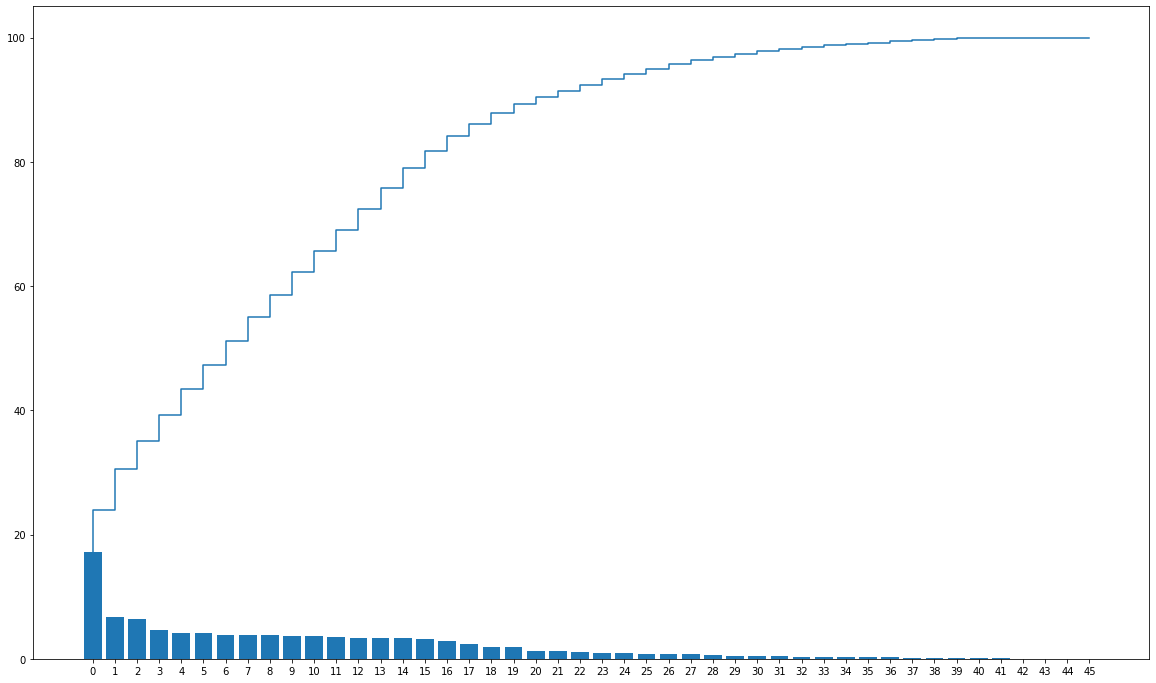

In [20]:
plt.figure(figsize=(20,12))
plt.bar(np.arange(46),evr)
plt.step(np.arange(46),cevr)
plt.xticks(np.arange(46))
plt.show()

In [21]:
xpca=PCA(n_components=22).fit_transform(xscaled)

#shape of xpca
xpca.shape

(1470, 22)

In [22]:
xpca

array([[-0.33055832, -1.6417422 ,  0.03564609, ...,  0.30886002,
        -0.28075222,  0.08243703],
       [ 0.58037516,  2.54257742,  2.07336024, ...,  1.04638144,
        -0.88536959,  0.55136582],
       [-2.49679052, -1.13615299,  0.43663213, ...,  0.20344748,
         0.17479017,  0.0130955 ],
       ...,
       [-1.21208694,  1.6475037 ,  1.8654862 , ..., -0.76113333,
        -0.48111566, -0.32977011],
       [ 1.02443531, -0.4437067 , -0.54227181, ...,  1.37078655,
         0.69318681,  0.84551484],
       [-1.22193193, -0.47745739, -0.82693733, ..., -0.12854826,
         0.71339831, -0.48566495]])

In [23]:
dfpca=pd.DataFrame(data=xpca, columns=np.arange(1,23))
dfpca.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.330558,-1.641742,0.035646,-0.546939,-2.123496,-0.119973,2.409488,-1.055866,0.382761,2.432467,0.465198,-1.696629,-0.914486,1.259742,-0.250873,0.194810,1.269403,2.007021,-1.006161,0.308860,-0.280752,0.082437
1,0.580375,2.542577,2.073360,-1.552854,0.158915,0.006880,-0.434652,1.369745,1.379630,-0.331992,0.912544,0.752941,-1.938849,0.673577,0.270127,0.621230,0.043809,-1.091191,-1.209891,1.046381,-0.885370,0.551366
2,-2.496791,-1.136153,0.436632,-0.890850,-1.532708,0.379633,-1.104317,0.002322,-0.445306,1.587283,1.468034,-0.222244,1.595457,0.961727,-0.449252,1.393536,1.284414,0.022936,0.170044,0.203447,0.174790,0.013095
3,-0.879033,-0.151853,-1.329413,-1.081375,-1.481621,0.300112,-0.060510,1.260530,-0.686382,0.046283,-1.116960,-0.545077,0.332002,1.867049,0.806305,0.202144,-0.727242,-0.634895,0.623732,0.206591,-0.823858,0.326825
4,-1.893993,-1.075098,-0.372161,-1.026794,-1.219146,-0.222005,-1.155865,0.137344,0.604770,-0.351998,1.085562,0.693992,-2.292661,-0.193809,1.766928,-0.851538,2.229797,0.506320,0.215173,-0.866215,0.502832,-0.518813


# Reduced to 22 Dimensions & Removed correlation

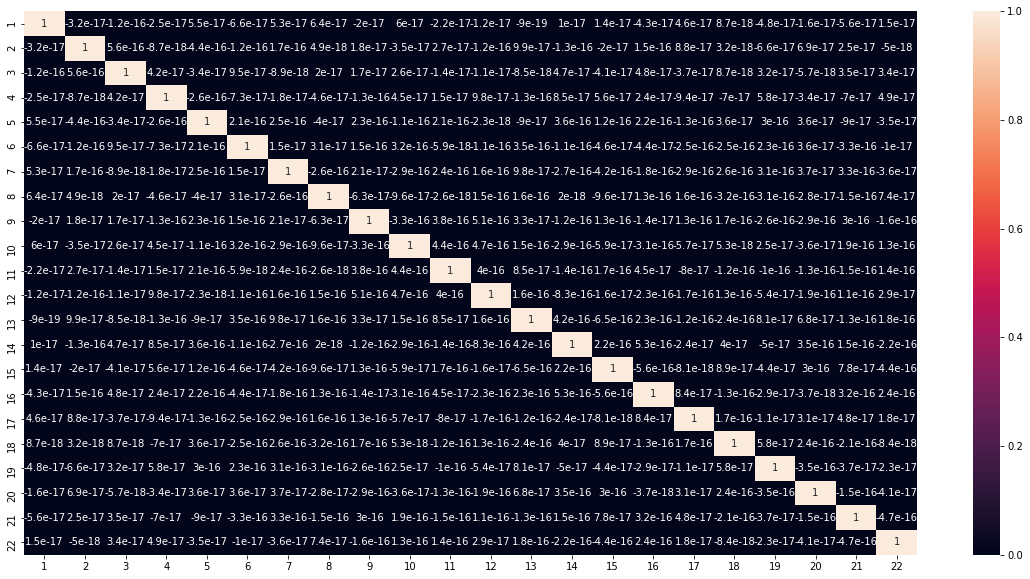

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(dfpca.corr() , annot=True)
plt.show()

# RandomForestClassifier - PCA Transformed 22D

Accuracy: 0.8390022675736961


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      0.84      0.91       434\n'
 '           1       0.07      0.71      0.12         7\n'
 '\n'
 '    accuracy                           0.84       441\n'
 '   macro avg       0.53      0.78      0.52       441\n'
 'weighted avg       0.98      0.84      0.90       441\n')


[[365  69]
 [  2   5]]




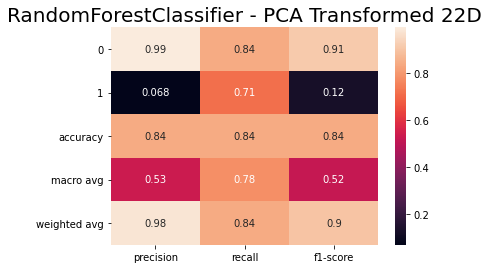

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dfpca, y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4176,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0,
    max_samples=None,
)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)

print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RandomForestClassifier - PCA Transformed 22D",fontsize=20)

plt.savefig("RandomForestClassifier - PCA Transformed 22D.jpg",bbox_inches="tight")

# RidgeClassifier - PCA Transformed 22D

Accuracy: 0.8707482993197279


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      0.87      0.93       435\n'
 '           1       0.10      1.00      0.17         6\n'
 '\n'
 '    accuracy                           0.87       441\n'
 '   macro avg       0.55      0.93      0.55       441\n'
 'weighted avg       0.99      0.87      0.92       441\n')


[[378  57]
 [  0   6]]




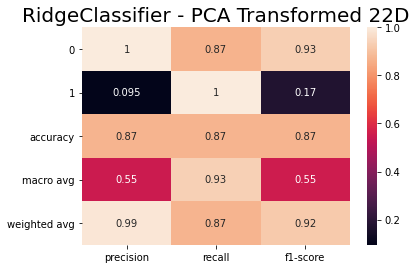

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfpca, y, test_size=0.3)
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4176,
                solver='auto', tol=0.001)
rc.fit(X_train,y_train)

y_pred=rc.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)

print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RidgeClassifier - PCA Transformed 22D",fontsize=20)

plt.savefig("RidgeClassifier - PCA Transformed 22D.jpg",bbox_inches="tight")